In [7]:
import matplotlib.pyplot as plt
import numpy as np
from neurodsp.sim import sim_powerlaw
#from sklearn.decomposition import PCA

# Circulant Matrices and Eigendecomposition


PCA is eigendecomposition of a covariance matrix:

$$
\begin{align*}
X^{\top}X = Q \Lambda Q^{\top}
\end{align*}
$$

Let $Q$ be fourier modes (cosines), then the eigenvalues (e.g. fourier coefficients is matrix is circular) is:

$$
\begin{align*}
\Lambda = Q^{\top}(X^{\top}X) Q
\end{align*}
$$

Circulancy of a matrix may be measured using the mean squared error between $\Lambda$ and $\Lambda \odot I$:

$$
\begin{align*}
\epsilon &= \frac{1}{n}||\Lambda - \Lambda \odot I||^2_2.
\end{align*}
$$

$\epsilon \to 0$ indicates a circulant matrix, e.g. cosine eigenvectors, and occurs when the $\Lambda$ is diagonal. Non-zero values in the off-diagonal increases $\epsilon$. 

$\epsilon$ can be computed for any arbitrary matrix and is a measure of whether oscillatory eigenvectors should be expected.

## Temporal Shifts

As shown in Shinn 2023, temporal shifts result in "phantom" oscillitions, thus $\epsilon \to 0$.

In [8]:
def sim_circulant(sig):
    """Simulates a circulant matrix."""
    n = len(sig)
    X = np.zeros((n, n))
    for i in range(len(sig)):
        X[i] = np.roll(sig, i)
    return X

Text(0.5, 1.0, 'Temporal Shifts')

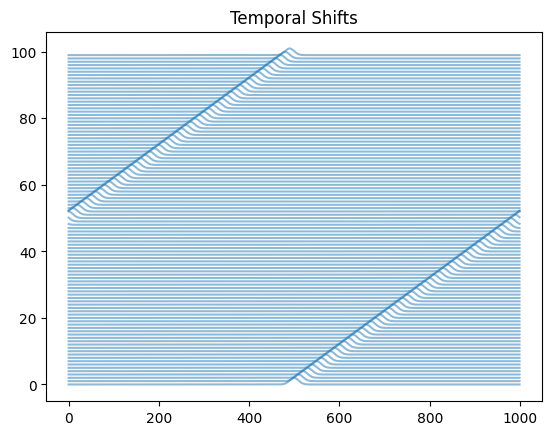

In [9]:
# Simulate temporally shifted gaussians as in Shinn 2024
sigma = 2
x = np.linspace(-100, 100, 1000)
gaussian = 10 * np.exp(-0.5 * (x/sigma)**2) / (sigma * np.sqrt(2 * np.pi))

X = sim_circulant(gaussian)
for i, x in enumerate(X[::10]):
    plt.plot(x+i, color='C0', alpha=.5)

plt.title('Temporal Shifts')

In [13]:
# Covariance matrix
cov = np.cov(X, rowvar=False)
n = len(cov)

# Fourier modes (e.g. cosines)
vecs = np.fft.fft(np.eye(n)) / np.sqrt(n)

# Eigenvalues given cosines as eigenvectors
Lambda = (vecs.conj().T @ cov @ vecs).real

# Error measure
epsilon = (((Lambda * np.eye(len(Lambda))) - Lambda)**2).mean()

# Epsilon -> zero == circulant matrix == oscillatory eigenvectors
print(epsilon)

3.2193118092902756e-35


In [11]:
Lambda.shape

(1000, 1000)

In [12]:
n

1000

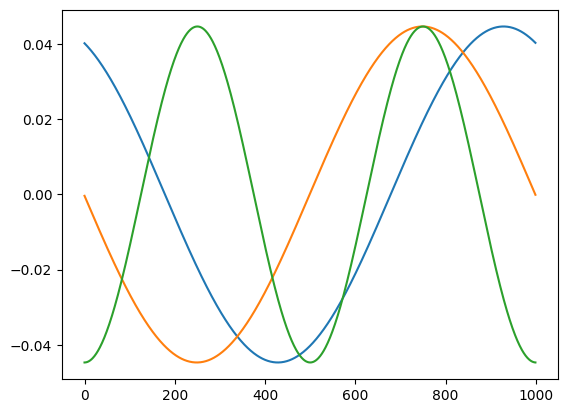

In [39]:
cov = np.cov(X, rowvar=False)
vals, vecs = np.linalg.eig(cov)

plt.plot(vecs.real[:, 0])
plt.plot(vecs.real[:, 1])
plt.plot(vecs.real[:, 2])

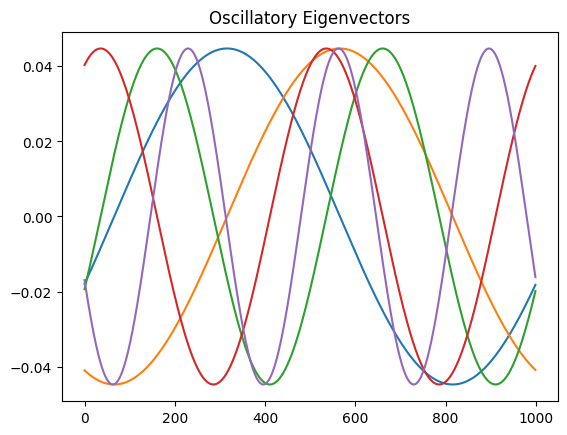

In [40]:
# Oscillatory eigenvectors
pca = PCA()
pca.fit(X)

for eigenvector in pca.components_[:5]:
    plt.plot(eigenvector)

plt.title('Oscillatory Eigenvectors');

## Powerlaws

From Shinn 2023: "phantom oscillations always appear as a 1/f -like pattern which decreases with increasing frequency".

In [6]:
# Simulate powerlaws and stack row-wise
X = np.array([
    sim_powerlaw(1, 1000, exponent=-2)
    for i in range(10000)
])

In [7]:
n = 1000

# Fourier modes (e.g. cosines)
vecs = np.fft.fft(np.eye(n)) / np.sqrt(n)

# Increase number of simulations step-wise
for i in range(1000, len(X), 1000):

    # Covariance matrix
    cov = np.cov(X[:i], rowvar=False)
    
    # Eigenvalues given cosines as eigenvectors
    Lambda = (vecs.conj().T @ cov @ vecs).real
    
    # Error measure
    epsilon = (1/n) * np.linalg.norm((Lambda * np.eye(len(Lambda))) - Lambda)**2
    
    print(f"n rows = {i}, epsilon = {epsilon}")

n rows = 1000, epsilon = 0.2527293797446156
n rows = 2000, epsilon = 0.10760725282194687
n rows = 3000, epsilon = 0.0769496357089345
n rows = 4000, epsilon = 0.124201778491461
n rows = 5000, epsilon = 0.09934543167656047
n rows = 6000, epsilon = 0.08724480094247516
n rows = 7000, epsilon = 0.08316935615995803
n rows = 8000, epsilon = 0.05933913095951753
n rows = 9000, epsilon = 0.0626598887398513


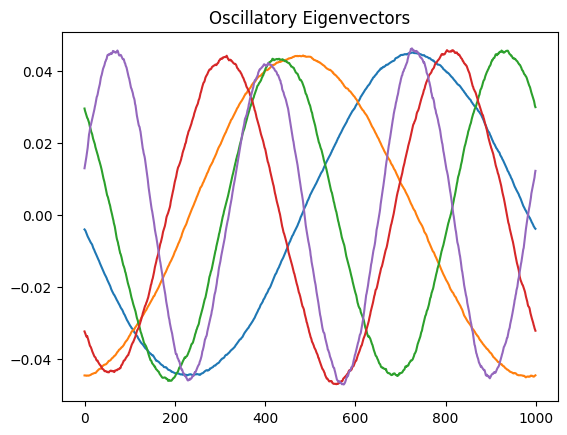

In [8]:
# Oscillatory eigenvectors
pca = PCA()
pca.fit(X)

for eigenvector in pca.components_[:5]:
    plt.plot(eigenvector)

plt.title('Oscillatory Eigenvectors');